In [5]:
import os
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [6]:
file_pattern = os.path.join("..", "data", "raw", "*.csv")
file_list = glob.glob(file_pattern) 

NameError: name 'glob' is not defined

In [7]:
file_list

NameError: name 'file_list' is not defined

In [8]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

NameError: name 'pd' is not defined

In [9]:
main_dataframe

NameError: name 'main_dataframe' is not defined

In [10]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

NameError: name 'main_dataframe' is not defined

<Axes: >

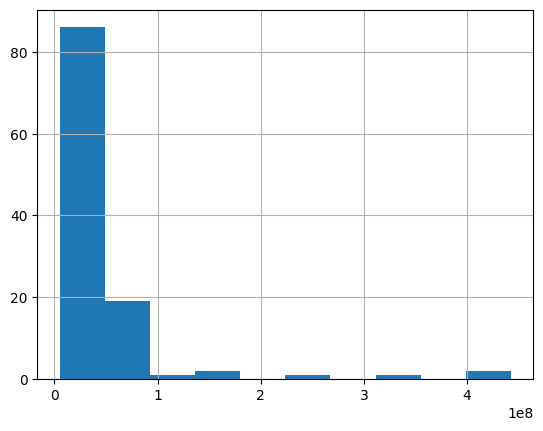

In [17]:
new_dataframe['price'].hist()

In [18]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

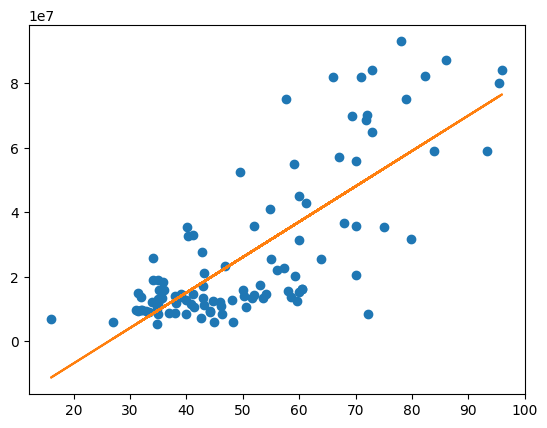

In [19]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

In [20]:
train_path_dir = os.path.join("..", "data", "processed")
if not os.path.exists(train_path_dir):
    os.mkdir(train_path_dir)

train_file_path = os.path.join(train_path_dir, "train.csv")

In [21]:
new_df.to_csv(train_file_path)